In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import mpl_toolkits.mplot3d.axes3d

# I. Heatmap

In [124]:
df = pd.read_csv('dataSales.csv')
df

,nama,mobil,jumlah
0,Andi,mobil A,20
1,Andi,mobil B,22
2,Andi,mobil C,66
3,Budi,mobil A,21
4,Budi,mobil B,19
5,Budi,mobil C,34
6,Caca,mobil A,33
7,Caca,mobil B,40
8,Caca,mobil C,2


In [125]:
df = df.pivot(index='nama', columns='mobil')
df

jumlah                
mobil mobil A mobil B mobil C
nama                         
Andi       20      22      66
Budi       21      19      34
Caca       33      40       2

## A. Show the heatmap with colorbar

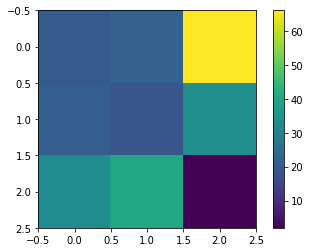

In [126]:
plt.imshow(df)
plt.colorbar()
plt.show()

## B. Ngeubah Ticknya

### Cara 1

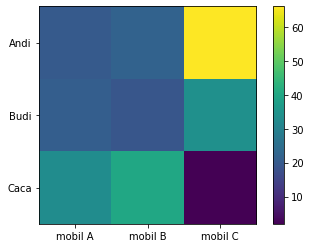

In [127]:
fig, p = plt.subplots()

plt.imshow(df)
plt.colorbar()

col = list(map(lambda x: x[1], df.columns.tolist()))
i = list(map(lambda x: x, df.index.tolist()))

plt.xticks(np.arange(len(col)))
p.set_xticklabels(col)
plt.yticks(np.arange(len(i)))
p.set_yticklabels(i)

plt.ylim(2.5, -.5)
plt.show()

### Cara 2

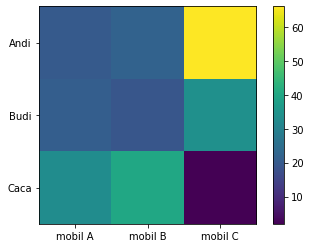

In [128]:
plt.imshow(df)
plt.colorbar()

# ngambil list kolomnya
col = list(map(lambda x: x[1], df.columns.tolist()))
# ngambil list indexnya
i = list(map(lambda x: x, df.index.tolist()))

plt.xticks(np.arange(len(col)), col)
plt.yticks(np.arange(len(i)), i)

plt.ylim(2.5, -.5)
plt.show()

## C. Ngeubah color mapnya

### 1. Hot Map

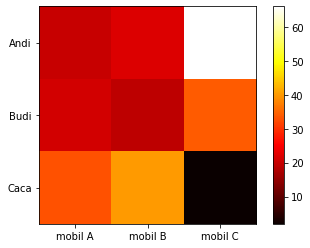

In [129]:
plt.imshow(df, cmap='hot')
plt.colorbar()

# ngambil list kolomnya
col = list(map(lambda x: x[1], df.columns.tolist()))
# ngambil list indexnya
i = list(map(lambda x: x, df.index.tolist()))

plt.xticks(np.arange(len(col)), col)
plt.yticks(np.arange(len(i)), i)

plt.ylim(2.5, -.5)
plt.show()

### 2. Reverse Hot Map

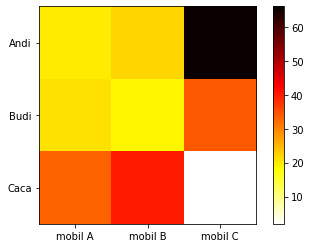

In [130]:
plt.imshow(df, cmap='hot_r')
plt.colorbar()

# ngambil list kolomnya
col = list(map(lambda x: x[1], df.columns.tolist()))
# ngambil list indexnya
i = list(map(lambda x: x, df.index.tolist()))

plt.xticks(np.arange(len(col)), col)
plt.yticks(np.arange(len(i)), i)

plt.ylim(2.5, -.5)
plt.show()

### 3. Dan lain-lain

## D. Nampilin value nya

### 1. Shows

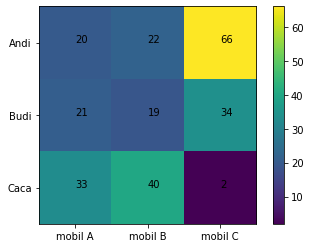

In [131]:
fig, p = plt.subplots()

plt.imshow(df)
plt.colorbar()

col = list(map(lambda x: x[1], df.columns.tolist()))
i = list(map(lambda x: x, df.index.tolist()))

for x in range(len(i)):
    for y in range(len(col)):
        p.text(y, x, df.iloc[x, y])

plt.xticks(np.arange(len(col)), col)
plt.yticks(np.arange(len(i)), i)

plt.ylim(2.5, -.5)
plt.show()

### 2. Ngeset fontsizenya

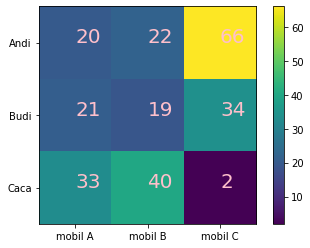

In [132]:
fig, p = plt.subplots()

plt.imshow(df)
plt.colorbar()

col = list(map(lambda x: x[1], df.columns.tolist()))
i = list(map(lambda x: x, df.index.tolist()))

for x in range(len(i)):
    for y in range(len(col)):
        p.text(y, x, df.iloc[x, y],
              color='pink', fontsize=20)

plt.xticks(np.arange(len(col)), col)
plt.yticks(np.arange(len(i)), i)

plt.ylim(2.5, -.5)
plt.show()

### 3. Ngeset Alignment nya

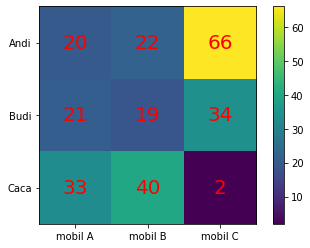

In [133]:
fig, p = plt.subplots()

plt.imshow(df)
plt.colorbar()

col = list(map(lambda x: x[1], df.columns.tolist()))
i = list(map(lambda x: x, df.index.tolist()))

for x in range(len(i)):
    for y in range(len(col)):
        p.text(y, x, df.iloc[x, y],
              color='r', fontsize=20,
              ha='center', va='center')

plt.xticks(np.arange(len(col)), col)
plt.yticks(np.arange(len(i)), i)

plt.ylim(2.5, -.5)
plt.show()

# II. Korelasi

In [137]:
dfAtlit = pd.read_csv('atlit.csv')
dfAtlit

,nama,BB,TB,cabor,freqMakan,freqLatihan,medal
0,Andi,45,195,basket,2,5,10
1,Budi,55,165,sepakbola,3,1,0
2,Caca,40,155,badminton,2,8,20


## A. Ngecek Korelasinya

In [138]:
dfCorr = dfAtlit.corr()
dfCorr

,BB,TB,freqMakan,freqLatihan,medal
BB,1.000000,0.052414,0.944911,-0.994192,-0.981981
TB,0.052414,1.000000,-0.277350,-0.159586,-0.240192
freqMakan,0.944911,-0.277350,1.000000,-0.904194,-0.866025
freqLatihan,-0.994192,-0.159586,-0.904194,1.000000,0.996616
medal,-0.981981,-0.240192,-0.866025,0.996616,1.000000


## B. Tampilkan di Heatmap

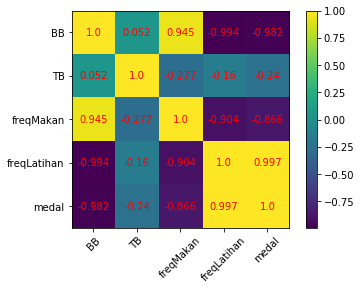

In [136]:
plt.imshow(dfCorr)
plt.colorbar()

# hanya col saja karna indexnya sama kayak col
col = list(map(lambda x: x, dfCorr.columns.tolist()))

for x in range(len(col)):
    for y in range(len(col)):
        plt.text(y, x, round(df.corr().iloc[x, y], 3),
                ha='center', va='center',
                color='r')
        
plt.xticks(np.arange(len(col)), col, rotation=45)
plt.yticks(np.arange(len(col)), col)

plt.ylim(4.5, -.5)
plt.show()

# III. 3D Ploting

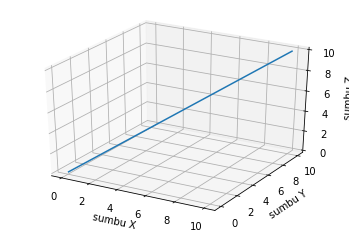

In [148]:
fig = plt.figure()
p = plt.subplot(111, projection='3d')
data = range(11)
x = np.array(data)

p.plot_wireframe(x, x, x.reshape(1,-1))
p.set_xlabel('sumbu X')
p.set_ylabel('sumbu Y')
p.set_zlabel('sumbu Z')
plt.show()